In [84]:
# 자료 결합

In [110]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [86]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [87]:
import tensorflow as tf

In [88]:
df = pd.read_csv('Z:/B01_HSCHUNG/PYTHON/B_CLASS/A_BigDataEconomics/C202201/DATA/D_HousePrice/HPI_SEOUL.csv', encoding='CP949')

In [89]:
df.tail()

,YYM1,CITY,CITY_CODE,GU_NAME,GU_CODE2,API_TT0,BaseRate,MoRate,FREQ,A_PSUM,...,LTV,DTI,MV_APT,JAEGO,BUNYANG,N_BUNYANG,IND_INDEX,JTP,LOAN_T,MON
1147,201612,서울특별시,11,강동구,1174,116.453338,1.25,3.13,72,3.614700,...,70.000000,63.611317,24.466097,3725,0,0,120.4,73.233545,305.476327,12
1148,201703,서울특별시,11,강동구,1174,117.595660,1.25,3.21,279,13.742008,...,70.000000,63.602881,24.466097,0,460,30,113.7,73.220091,307.784349,3
1149,201706,서울특별시,11,강동구,1174,127.266315,1.25,3.22,362,19.242373,...,70.000000,63.611486,24.466097,0,1745,0,98.4,72.379698,315.170313,6
1150,201709,서울특별시,11,강동구,1174,130.400708,1.25,3.24,193,11.178257,...,46.062176,43.937824,24.466097,687,0,0,129.0,71.199624,316.459837,9
1151,201712,서울특별시,11,강동구,1174,133.046313,1.50,3.42,82,4.605583,...,45.365854,44.634146,24.466097,0,0,0,111.5,70.058967,319.561803,12


In [90]:
df1 = df[['API_TT0', 'GU_CODE2', 'BaseRate', 'IND_INDEX', 'LTV', 'DTI']]

In [91]:
df1.tail(3)

,API_TT0,GU_CODE2,BaseRate,IND_INDEX,LTV,DTI
1149,127.266315,1174,1.25,98.4,70.000000,63.611486
1150,130.400708,1174,1.25,129.0,46.062176,43.937824
1151,133.046313,1174,1.50,111.5,45.365854,44.634146


In [92]:
#pd.options.display.max_columns = 50
pd.options.display.max_rows = 10000

In [93]:
df2 = df1.copy()

In [94]:
df2['BaseRate1']= df2.groupby('GU_CODE2')['BaseRate'].shift(1)
df2['IND_INDEX1']= df2.groupby('GU_CODE2')['IND_INDEX'].shift(1)
df2['LTV1']= df2.groupby('GU_CODE2')['LTV'].shift(1)
df2['DTI1']= df2.groupby('GU_CODE2')['DTI'].shift(1)

In [95]:
df2['BaseRate2']= df2.groupby('GU_CODE2')['BaseRate'].shift(2)
df2['IND_INDEX2']= df2.groupby('GU_CODE2')['IND_INDEX'].shift(2)
df2['LTV2']= df2.groupby('GU_CODE2')['LTV'].shift(2)
df2['DTI2']= df2.groupby('GU_CODE2')['DTI'].shift(2)

In [96]:
df3 = df2.dropna()

In [97]:
df3.head()

,API_TT0,GU_CODE2,BaseRate,IND_INDEX,LTV,DTI,BaseRate1,IND_INDEX1,LTV1,DTI1,BaseRate2,IND_INDEX2,LTV2,DTI2
2,81.208640,1111,4.5,123.203,44.425621,94.000000,4.25,99.469,43.944172,94.827586,4.00,109.907,42.912677,93.255607
3,88.068940,1111,4.5,128.718,50.340131,95.151515,4.50,123.203,44.425621,94.000000,4.25,99.469,43.944172,94.827586
4,86.507762,1111,4.5,110.893,50.951451,48.890836,4.50,128.718,50.340131,95.151515,4.50,123.203,44.425621,94.000000
5,91.769299,1111,4.5,102.227,51.251565,48.351863,4.50,110.893,50.951451,48.890836,4.50,128.718,50.340131,95.151515
6,92.079847,1111,5.0,108.332,52.053270,48.055339,4.50,102.227,51.251565,48.351863,4.50,110.893,50.951451,48.890836


<h3> OLS를 이용한 회귀분석</h3>

In [98]:
edu_model = ols("API_TT0 ~ BaseRate1 + IND_INDEX1 + LTV2", data=df3).fit()

In [99]:
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                API_TT0   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          2.85e-107
Time:                        15:07:39   Log-Likelihood:                -3861.4
No. Observations:                1104   AIC:                             7731.
Df Residuals:                    1100   BIC:                             7751.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0618      3.592     19.784      0.0

<h3>  Machine Learning을 이용한 회귀분석 </h3>

In [100]:
X = df3[['BaseRate1', 'IND_INDEX1', 'LTV2']].to_numpy()

In [101]:
X = X.astype('float32')

In [102]:
k = X.shape[1]

In [103]:
k

3

In [104]:
X.shape

(1104, 3)

In [105]:
y = df3[['API_TT0']].to_numpy()

In [106]:
y = y.astype('float32')

In [107]:
y.shape

(1104, 1)

In [108]:
W = tf.Variable(tf.random.normal((k, 1)))
b = tf.Variable(tf.random.normal((1,)))

In [109]:
#b = tf.Variable(10.01) # 3 Dimension
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.65960777], dtype=float32)>

In [63]:
loss = []

In [64]:
learning_rate = tf.Variable(0.00001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(X, W) + b 
        cost = tf.reduce_mean(tf.square(hypothesis - y))
        loss.append(cost.numpy())

        W_grad, b_grad = tape.gradient(cost, [W, b])
        
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.6f} ".format(i, cost.numpy()))

    0 | 46558.316406 
  100 | 128.894241 
  200 | 119.313721 
  300 | 111.955795 
  400 | 106.304649 
  500 | 101.964195 
  600 |  98.630180 
  700 |  96.069107 
  800 |  94.101555 
  900 |  92.589798 
 1000 |  91.428047 


In [83]:
print('b:',b.numpy())
print('W:',W.numpy().flatten())

b: [-0.1785343]
W: [-0.30079165  0.5436497   0.6946181 ]


In [78]:
np.ndim(W)

2

In [67]:
edu_model.params

Intercept     71.061831
BaseRate1     -3.182927
IND_INDEX1     0.168060
LTV2           0.290994
dtype: float64

In [68]:
def predict(X):
    return tf.matmul(X, W) + b

In [111]:
x = X[1].reshape(1,3)

In [ ]:
x = [[4.5, 120, 45]]

In [ ]:
x

In [ ]:
predict(x)

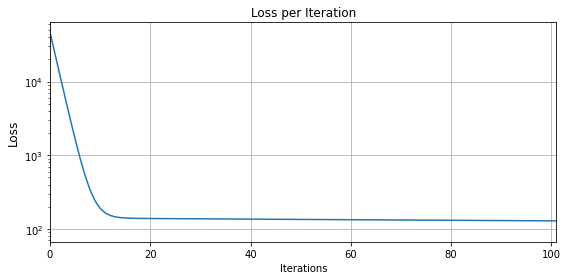

In [71]:
n_iterations = 101

ax = pd.Series(loss).plot(figsize=(8, 4), title='Loss per Iteration', xlim=(0, n_iterations), logy=True)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss', fontsize=12, rotation=90)
plt.grid()
plt.tight_layout()
plt.savefig("ML_회귀분석01.png", dpi=150, bbox_inches='tight')